In [32]:
%matplotlib inline
import numpy as np
#codes from text book
zero_qubit=np.matrix('1; 0')
one_qubit=np.matrix('0; 1')

#def from book
def zero_to_one_qubit(percentage_zero,percentage_one):
     if not percentage_zero+percentage_one==100 or percentage_zero<0 or percentage_one<0: raise Exception("percentages must add up to 100\% and both be positive ")
     return np.sqrt(percentage_zero/100.)*zero_qubit+np.sqrt(percentage_one/100.)*one_qubit


[[0]]


In [50]:
#Question 1:
fifty_fifty_qubit=zero_to_one_qubit(50,50)
ten_ninety_qubit=zero_to_one_qubit(10,90)
twenty_eighty_qubit=zero_to_one_qubit(20,80)
zero_hundred_qubit = zero_to_one_qubit(0,100)
hundred_zero_qubit = zero_to_one_qubit(100,0)

print("fifty_fifty",fifty_fifty_qubit)
print("ten_ninety",ten_ninety_qubit)
print("fortytwo_fiftyeight",zero_to_one_qubit(42,58))
print("twenty_eighty",twenty_eighty_qubit)
print("100% zero:", hundred_zero_qubit)
print("100% one", zero_hundred_qubit)

#As the output can reveal the answer.

fifty_fifty [[0.70710678]
 [0.70710678]]
ten_ninety [[0.31622777]
 [0.9486833 ]]
fortytwo_fiftyeight [[0.64807407]
 [0.76157731]]
twenty_eighty [[0.4472136 ]
 [0.89442719]]
100% zero: [[1.]
 [0.]]
100% one [[0.]
 [1.]]


In [54]:
#Question 2:
def qubit_to_percentage(qb) :
    result = np.matrix('1; 0')
    result[0][0] = qb[0][0]**2 * 100  
    result[1][0] = qb[1][0]**2 * 100
    return result
print("fifty_fifty" , qubit_to_percentage(fifty_fifty_qubit))
print("twenty_eighty" , qubit_to_percentage(twenty_eighty_qubit))

fifty_fifty [[50]
 [50]]
twenty_eighty [[20]
 [80]]


[[0.70710678+0.j        ]
 [0.        +0.70710678j]]


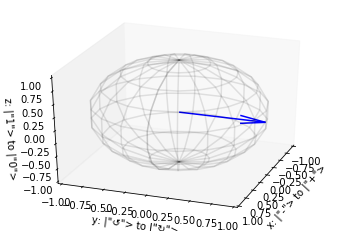

In [93]:
#Q3
clockwise_qubit = (zero_qubit + np.complex(0,1) * one_qubit) / np.sqrt(2)
counterclockwise_qubit = (zero_qubit - np.complex(0,1) * one_qubit) / np.sqrt(2)
print(clockwise_qubit)
plot_bloch(clockwise_qubit)

In [59]:
#Q4
#defs from book
def get_bloch_coordinates(qubit):
    def get_x_bloch(qubit):
        qubit_x_basis=1./np.sqrt(2)*np.matrix('1 1; 1 -1')*qubit 
        prob_zero_qubit=(qubit_x_basis.item(0)*qubit_x_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_x_basis.item(1)*qubit_x_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
        
    def get_y_bloch(qubit):
        qubit_y_basis=1./np.sqrt(2)*np.matrix('1 1; 1 -1')*np.matrix([[1,0],[0,-np.complex(0,1)]])*qubit
        prob_zero_qubit=(qubit_y_basis.item(0)*qubit_y_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_y_basis.item(1)*qubit_y_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
    
    def get_z_bloch(qubit):
        qubit_z_basis=qubit
        prob_zero_qubit=(qubit_z_basis.item(0)*qubit_z_basis.item(0).conjugate()).real
        prob_one_qubit=(qubit_z_basis.item(1)*qubit_z_basis.item(1).conjugate()).real
        return prob_zero_qubit-prob_one_qubit
    return (get_x_bloch(qubit),get_y_bloch(qubit),get_z_bloch(qubit))

plus_qubit=1/np.sqrt(2)*np.matrix('1; 1')
minus_qubit=1/np.sqrt(2)*np.matrix('1; -1')
clockwisearrow_qubit=1/np.sqrt(2)*np.matrix([[1],[np.complex(0,1)]])    
counterclockwisearrow_qubit=1/np.sqrt(2)*np.matrix([[1],[-np.complex(0,1)]])

print("zero_qubit:",get_bloch_coordinates(zero_qubit))
print("one_qubit",get_bloch_coordinates(one_qubit))
print("clockwisearrow_qubit:",get_bloch_coordinates(clockwisearrow_qubit))
print("counterclockwisearrow_qubit:",get_bloch_coordinates(counterclockwisearrow_qubit))
print("plus_qubit:",get_bloch_coordinates(plus_qubit))
print("minus_qubit:",get_bloch_coordinates(minus_qubit))


zero_qubit: (0.0, 0.0, 1)
one_qubit (0.0, 0.0, -1)
clockwisearrow_qubit: (0.0, 0.9999999999999996, 0.0)
counterclockwisearrow_qubit: (0.0, -0.9999999999999996, 0.0)
plus_qubit: (0.9999999999999996, 0.0, 0.0)
minus_qubit: (-0.9999999999999996, 0.0, 0.0)


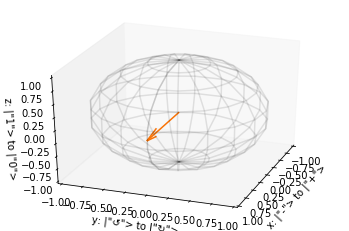

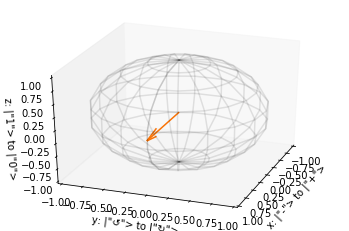

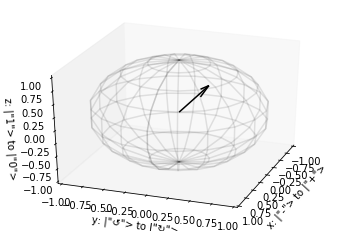

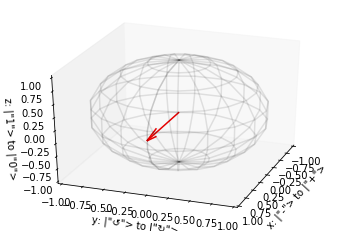

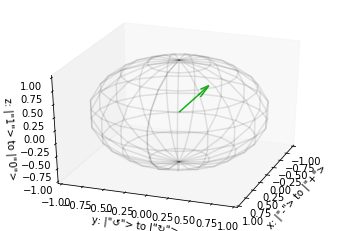

In [66]:
#Q5
#def from book
def plot_bloch(qubit,color='b',ax=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        # draw sphere
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.cos(u)*np.sin(v)
        y = np.sin(u)*np.sin(v)
        z = np.cos(v)
        ax.plot_wireframe(x, y, z, color="k",alpha=.1)
        ax.grid(False)

    coordinates=get_bloch_coordinates(qubit)
    ax.quiver([0],[0],[0],[coordinates[0]],[coordinates[1]],[coordinates[2]],length=1,color=color,arrow_length_ratio=0.3)
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.set_zlim([-1,1])
    ax.set_xlabel('x: |"-"> to |"+">')
    ax.set_ylabel('y: |"↺"> to |"↻">')
    ax.set_zlabel('z: |"1"> to |"0">')
    ax.view_init(azim=20)
    return ax

#give a new def of zero_to_one_qubit, add two more integers as indicator to positive/negative
#attention, indicator can only be eighther -1 or 1 (for the convenient)
def zero_to_one_qubit(percentage_zero,percentage_one, indicator_1 = 1, indicator_2 = 1):
     if not percentage_zero+percentage_one==100 or percentage_zero<0 or percentage_one<0: raise Exception("percentages must add up to 100\% and both be positive ")
     return indicator_1 * np.sqrt(percentage_zero/100.)*zero_qubit+indicator_2*np.sqrt(percentage_one/100.)*one_qubit


plot_bloch(zero_to_one_qubit(50,50),color='xkcd:orange')
#4 possibilities
plot_bloch(zero_to_one_qubit(50,50,1,1),color='xkcd:orange')
plot_bloch(zero_to_one_qubit(50,50,1,-1),color='xkcd:black')
plot_bloch(zero_to_one_qubit(50,50,-1,-1),color='xkcd:red')
plot_bloch(zero_to_one_qubit(50,50,-1,1),color='xkcd:green')

clock wise above, counter clock below


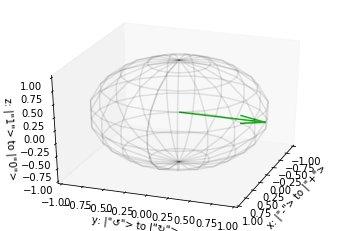

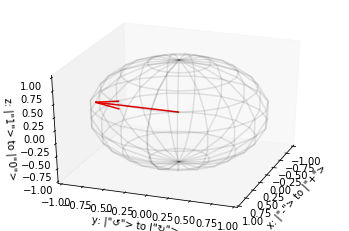

In [95]:
#Q6
#my way is to first convert /+>  and /-> to /0> and /1> first, then convert
clockwi_qubit = ((np.sqrt(2) * plus_qubit - one_qubit) + np.complex(0,1) * 
                   (np.sqrt(2) * plus_qubit - zero_qubit)) / np.sqrt(2)
counterclockwi_qubit = ((np.sqrt(2) * plus_qubit - one_qubit) - np.complex(0,1) * 
                   (np.sqrt(2) * plus_qubit - zero_qubit)) / np.sqrt(2)
clockwisearrow_qubit = (zero_qubit - np.sqrt(1)*one_qubit) / np.sqrt(2)
print("clock wise above, counter clock below")
plot_bloch(clockwi_qubit,color='xkcd:green')
plot_bloch(counterclockwi_qubit,color='xkcd:red')


In [ ]:
#I would reference andrew's answer